### Setting up libraries

In [1]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

dataset_path = 'C:/Users/nurma/Downloads/dataset_salary/Salary_Data.csv' # Define the target variable (dependent variable)

target_variable = "Salary"

In [13]:
df = pd.read_csv(dataset_path)

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [14]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (375, 6)


In [15]:
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [16]:
print("Summary statistics:")
print(df.describe())

Summary statistics:
              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.000000  250000.000000


### basic data preprocessing steps:
- handling missing values

In [17]:
print(df.isnull().sum())

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imputer = SimpleImputer(strategy='most_frequent')
df['Education Level'] = imputer.fit_transform(df[['Education Level']])
df['Gender'] = imputer.fit_transform(df[['Gender']])
df['Job Title'] = imputer.fit_transform(df[['Job Title']])

In [20]:
imputer = SimpleImputer(strategy='mean')
df['Salary'] = imputer.fit_transform(df[['Salary']])
df['Age'] = imputer.fit_transform(df[['Age']])
df['Years of Experience'] = imputer.fit_transform(df[['Years of Experience']])

In [21]:
print(df.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


 - encoding categorical variables

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Edu_Level_Encoded'] = label_encoder.fit_transform(df['Education Level'])
df['Job_Title_Encoded'] = label_encoder.fit_transform(df['Job Title'])
df['Gender_Encoded'] = label_encoder.fit_transform(df['Gender'])

In [23]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Edu_Level_Encoded,Job_Title_Encoded,Gender_Encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0,159,1
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,1,17,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,2,130,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,101,0
4,52.0,Male,Master's,Director,20.0,200000.0,1,22,1


In [24]:
df.drop(['Job Title', 'Education Level', 'Gender'], axis=1, inplace=True)

In [25]:
df.head()

,Age,Years of Experience,Salary,Edu_Level_Encoded,Job_Title_Encoded,Gender_Encoded
0,32.0,5.0,90000.0,0,159,1
1,28.0,3.0,65000.0,1,17,0
2,45.0,15.0,150000.0,2,130,1
3,36.0,7.0,60000.0,0,101,0
4,52.0,20.0,200000.0,1,22,1


### Linear Regression model:
- Define the target variable (dependent) and features (independent var).


In [27]:
# Define the target variable (dependent variable)
target_variable = "Salary"

In [28]:
features = df.drop(columns=[target_variable])

In [29]:
print("Features (Independent Variables):")
print(features.columns.tolist())

Features (Independent Variables):
['Age', 'Years of Experience', 'Edu_Level_Encoded', 'Job_Title_Encoded', 'Gender_Encoded']


In [30]:
print("\nTarget Variable (Dependent Variable):")
print(target_variable)


Target Variable (Dependent Variable):
Salary


- Split the data into train and test sets

In [31]:
from sklearn.model_selection import train_test_split
#We specify test_size=0.2 to allocate 20% of the data for testing.
#We ensure that target is used as the actual target variable data, not just the target variable name.

In [32]:
target_data = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(features, target_data, test_size=0.2, random_state=42)

In [33]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (300, 5) (300,)
Testing set shape: (75, 5) (75,)


- Obtaining predicted salaries for each sample in the test set

In [34]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression


In [35]:
model = LinearRegression() #creating the instance of the class
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [36]:
print(y_pred)

[175073.09678309  93527.75743975 131620.78958975  83848.04061716
 161386.56496072 187378.26223032 157835.93101579 104583.28976823
  57557.54791633 100888.38309519 142294.93097737 160308.34081257
  51264.3392103   89389.51800957  63302.88489979 162564.94675997
  69030.12760519  48204.49857362  79425.05812696  98333.58572184
 130167.0106661  108010.38643028 165361.53334534  61260.94574217
  88051.98535241  48709.29105942 178092.79846658  93627.78541567
 156939.37616243 147468.14708569  43298.06304813 125996.67384324
  54878.36241436 152611.59411021  91004.80668156  16953.70808122
 183859.17486645  51068.67073796  37729.97120065  59019.21792458
  44259.73695862  88397.45233495 168755.93895859 164542.64187563
  43088.34220458 156382.15209214 123217.88150182  53142.20573319
  49093.89173644  35340.19975798 103076.04983193  80573.65857946
  77265.71788594 103904.59368346 163168.59160404  65942.93670728
 188021.36982718  77309.22254558  46895.41780095  85963.87619855
 119063.60271282 139335.3

- Obtaining the coefficients 

They indicate the magnitude and direction of the relationship between each feature and the impact on the target 

In [37]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [ 3422.72569688  2205.21020317 14963.34055701    39.13369447
  7552.47397425]
Intercept: -65297.877105749634


- Calculationg performance Metrics

> Mean Squared Error (MSE): Measures the average squared difference between the predicted values and the actual values.

> Root Mean Squared Error (RMSE): The square root of the MSE, which provides a more interpretable measure of the error.

> R-squared (R²): Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values indicate better fit.

> Mean Absolute Error (MAE): Measures the average absolute difference between the predicted values and the actual values.

In [38]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [39]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R²) score:", r2)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error: 246873399.55119023
Root Mean Squared Error: 15712.205432439783
R-squared (R²) score: 0.8980913648766511
Mean Absolute Error (MAE): 10744.500972240936


- Creating the prediction plot

> Ideally, the points should form a diagonal line, indicating perfect predictions. Deviation from this line suggests model inaccuracies.

In [40]:
import matplotlib.pyplot as plt

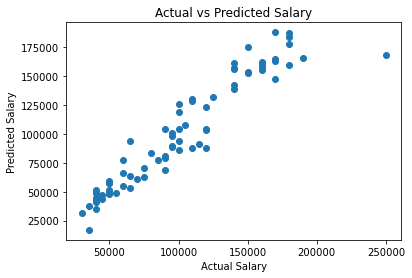

In [41]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

- Creating the plot of Residuals:

> Residuals are the differences between the actual and predicted values. 

> Ideally, residuals should be randomly distributed around zero, indicating that the model is making unbiased predictions. Patterns or trends in the residuals may indicate issues with the model, such as heteroscedasticity or systematic bias.

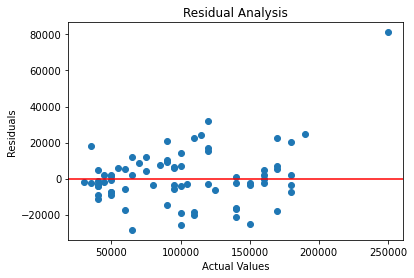

In [42]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

- Creating bar plot: feature importances

> The x-axis represents the importance of each feature.

> The y-axis represents the features themselves.

> Each bar represents the importance of a particular feature. The taller the bar, the more important the feature is in predicting the salary.

> Features with higher importance are more influential in the model's decision-making process. This information can be valuable for feature selection, model interpretation.

In [43]:
feature_names = features.columns

importance = model.coef_

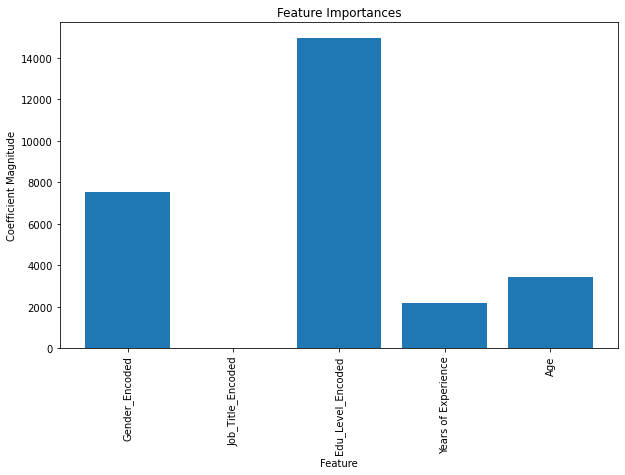

In [44]:
# Reverse the order of coefficients and feature names
importance_reverse = importance[::-1]
feature_names_reverse = feature_names[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names_reverse, importance_reverse)
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

### hyperparameter tuning and cross- validation usage with linear regression

the best hyperparameters and the best model found during grid search

In [45]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [46]:
# hyperparameters grid
param_grid = {
    'fit_intercept': [True, False]  # Whether to fit an intercept or not
}

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Grid Search Cross-Validation to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
# Perform grid search to find the best hyperparameters
grid_search.fit(X, y)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [48]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [59]:
from sklearn.model_selection import cross_val_score

print("Mean Squared Error:", mse)

Mean Squared Error: 207669569.55161273


In [58]:
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", np.mean(cv_rmse_scores))

Cross-Validation RMSE Scores: [17685.29440001 25685.80843132 10113.05009918 14250.32849889
 14037.23877846]
Mean Cross-Validation RMSE: 16354.344041573442


In [60]:
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Best Model):", mse)

Mean Squared Error (Best Model): 207669569.55161273


In [61]:
from sklearn.model_selection import cross_val_predict

# Perform cross-validation prediction
y_pred_cv = cross_val_predict(model, X, y, cv=5)

In [62]:
print(y_pred_cv)

[ 68062.12831491  52952.80910909 160824.94631286  77839.66223184
 180570.61233208  48780.30074153 122797.30643062  60936.78397738
  29931.95146898 125978.35235717  66257.40859103 143347.40308753
  77223.69016631 121830.53572903  40822.53681333 133353.22722861
  80907.65896846 133602.31311051  22589.96518946 171635.13948038
  76860.48064979 165738.0626068   51050.11849661  83049.37726877
 127679.90532467  43340.14370298 105966.83657368  29759.34013782
 147320.66318816  85233.42194253 174086.72877564  51707.35176709
  62911.49415366  94834.71375091 177190.22570676  44529.52115401
  73186.78311489 134877.46364286  28343.2438944  162697.33259863
  80856.32091313 164235.56348937  54678.0074078   78097.56537877
 130688.82118561  37160.69414172  64234.78733979 141301.97009477
 128619.31686597  29893.69124874 162718.63451963  85780.18101211
 102073.53327405 165713.99127991  43636.11265329  89943.89077097
  50834.30076417 159448.96305418  52277.95058473  94219.37147806
 178775.53408277  51421.2

### plot after cross-validation

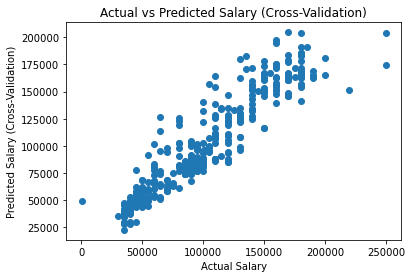

In [63]:

# Plot actual versus predicted values
plt.scatter(y, y_pred_cv)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary (Cross-Validation)')
plt.title('Actual vs Predicted Salary (Cross-Validation)')
plt.show()